PHASE 1 PROJECT

AVIATION ACCIDENT DATA ANALYSIS

INTRODUCTION

Aviation safety has always been a global concern, as accidents can result in catastrophic loss of life and property. This project analyzes a dataset of 13,967 aviation accidents spanning over a century (1919–present). The goal is to uncover trends, highlight risk factors, and identify insights that can improve aviation safety.

OBJECTIVES

The main points of the analysis are:

1: To examine the trends of accidents in time, and determine how aviation safety has changed.
2: To examine the distribution of fatalities by country, operator and aircraft type.
3: To classify the accidents (A1, A2, U1, H1, etc.), and determine the most common causes.
4: To compare severity of accidents (fatal and non-fatal).
5: To give a statement on how to reduce accidents in the future in aviation.

DATACLEANING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('aviation-accident-data-2023-05-16.csv')
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [6]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [7]:
#dropping rows with missing values
df.dropna(inplace=True)
df

,date,type,registration,operator,fatalities,location,country,cat,year
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,date unk.,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,date unk.,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [8]:
#removing NAN values
df.isnull().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [9]:
#standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

In [10]:
#removing leading or trailing whitespaces from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df

C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\1121321189.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,date,type,registration,operator,fatalities,location,country,cat,year
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,date unk.,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,date unk.,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [11]:
#removing rows with unknown years
# Remove rows where year is unknown (year == 0)
df = df[df['year'] != 0]
df


,date,type,registration,operator,fatalities,location,country,cat,year
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,date unk.,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,date unk.,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [12]:
#changing date format to yyyy-mm-dd
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\284377879.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,date,type,registration,operator,fatalities,location,country,cat,year
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,NaT,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,NaT,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,NaT,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,NaT,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [13]:
#checking for duplicate rows
df.duplicated().sum()
df


,date,type,registration,operator,fatalities,location,country,cat,year
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,NaT,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,NaT,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,NaT,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,NaT,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [14]:
#checking for unknown or placeholder values in important columns
df['year'].value_counts()

year
1944    640
1945    505
1943    388
1969    285
1946    285
       ... 
1927      2
1925      2
1924      2
1922      2
1919      1
Name: count, Length: 106, dtype: int64

In [15]:
#checking for unknown dates
df['date'].value_counts()

date
1944-06-06    33
1944-09-17    21
1989-09-18    19
1944-09-19    19
1944-09-21    19
              ..
1970-07-15     1
1970-07-16     1
1970-07-28     1
1970-07-30     1
2023-05-15     1
Name: count, Length: 13210, dtype: int64

In [16]:
#filling missing dates
df['date'] = df['date'].fillna(method='ffill')
df['date'].value_counts()

C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\1565191434.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'] = df['date'].fillna(method='ffill')


date
1944-06-06    33
1944-09-17    21
1944-09-19    19
1944-09-21    19
1989-09-18    19
              ..
1970-08-06     1
1970-08-12     1
1970-08-19     1
1970-08-23     1
2023-05-15     1
Name: count, Length: 13210, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18642 entries, 4 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18626 non-null  datetime64[ns]
 1   type          18642 non-null  object        
 2   registration  18642 non-null  object        
 3   operator      18642 non-null  object        
 4   fatalities    18642 non-null  object        
 5   location      18642 non-null  object        
 6   country       18642 non-null  object        
 7   cat           18642 non-null  object        
 8   year          18642 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.4+ MB


In [18]:
#removing rows where year is unknown (year == 0)
# Remove rows where year is 'unknown'
df = df[df['year'] != 'unknown']





In [19]:
#converting year to integer
df['year'] = df['year'].astype(int)


C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\3953463092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18626 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18626 non-null  datetime64[ns]
 1   type          18626 non-null  object        
 2   registration  18626 non-null  object        
 3   operator      18626 non-null  object        
 4   fatalities    18626 non-null  object        
 5   location      18626 non-null  object        
 6   country       18626 non-null  object        
 7   cat           18626 non-null  object        
 8   year          18626 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 1.3+ MB


In [21]:
#changing fatalities from object to integer
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0).astype(int)
df['fatalities'] = df['fatalities'].replace(-1, 0) 

C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\3651786826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0).astype(int)
C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\3651786826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].replace(-1, 0)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18626 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18626 non-null  datetime64[ns]
 1   type          18626 non-null  object        
 2   registration  18626 non-null  object        
 3   operator      18626 non-null  object        
 4   fatalities    18626 non-null  int32         
 5   location      18626 non-null  object        
 6   country       18626 non-null  object        
 7   cat           18626 non-null  object        
 8   year          18626 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 1.3+ MB


In [23]:
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920


DATA VISUALIZATION

c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


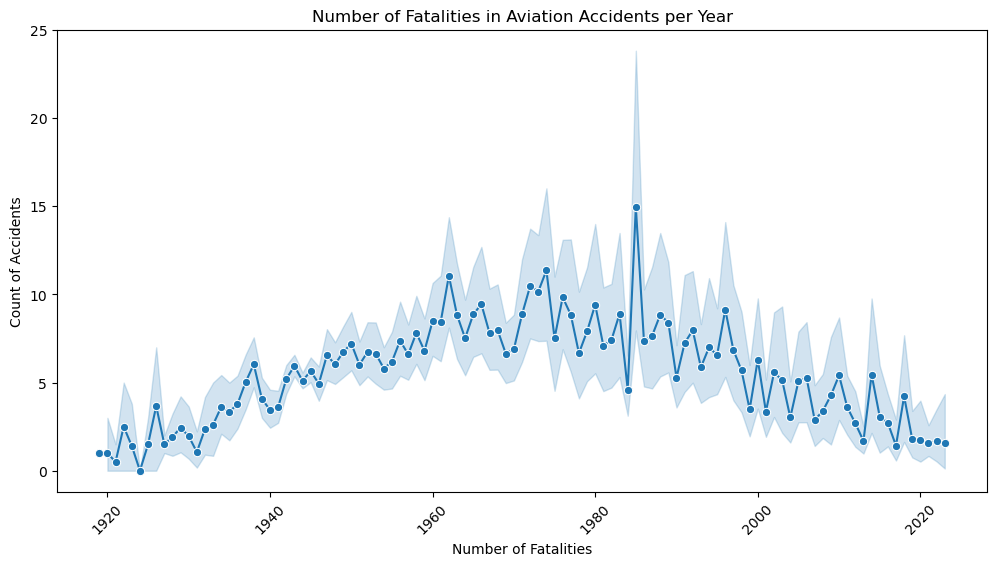

In [24]:
#line graph of fatalities over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fatalities', marker='o')
plt.title('Number of Fatalities in Aviation Accidents per Year')
plt.xlabel('Number of Fatalities')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()

line chart of total fatalities per year,the line chart shows that there was high fatality rate around 1940s ,probably due to world war II

c:\Users\DAMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


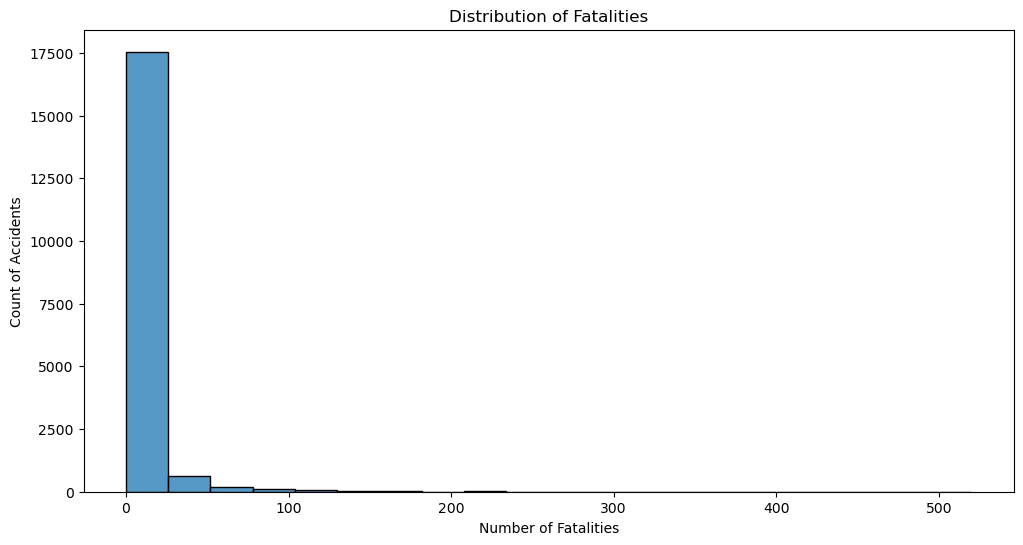

In [25]:
#histogram of fatalities
top_countries = df['country'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.histplot(df['fatalities'], bins=20, kde=False)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Count of Accidents')
plt.show()

Histogram of distribution of fatalities per category.

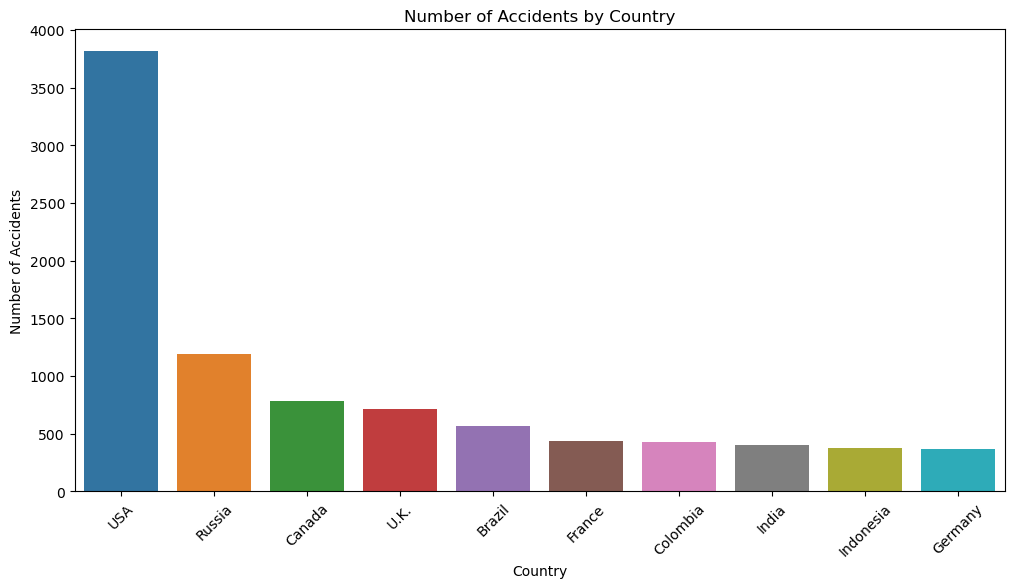

In [26]:
#bar chart of accidents per country
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Number of Accidents by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


bar chart of fatalitY RATE OF TOP 10 countries by fatalities,this shows that USA,Russia,Canada,etc has the highest fatalities compared to other countries.

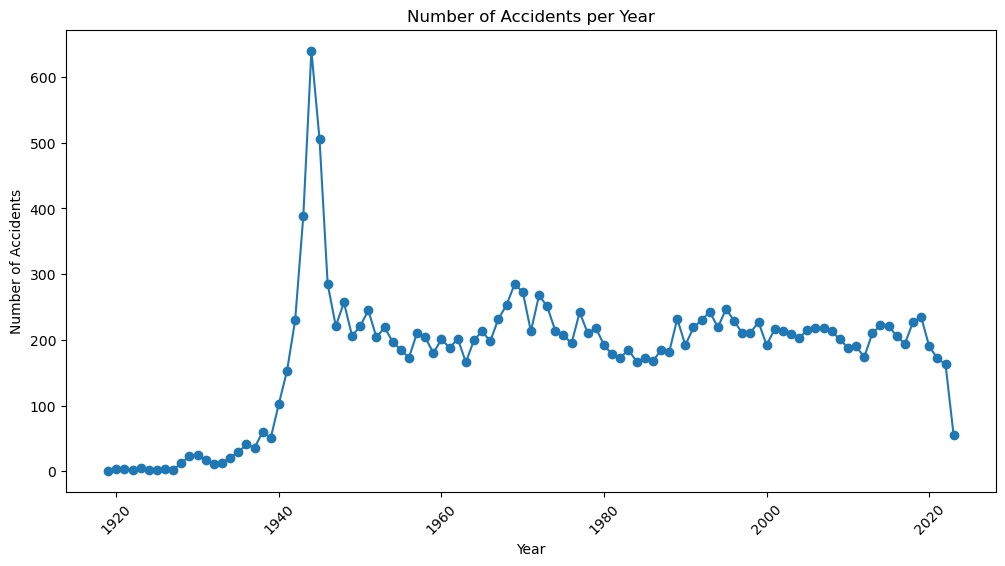

In [27]:
#line chart of accidents over years
Accidents_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(Accidents_per_year.index, Accidents_per_year.values, marker='o')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Line chart of accident over years

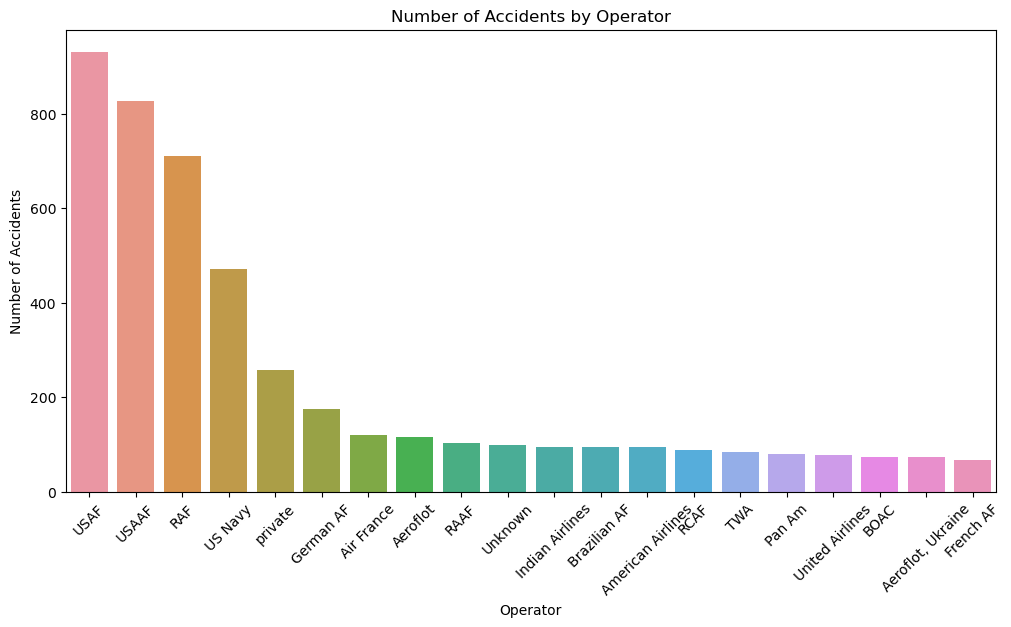

In [28]:
#top 20 operators by accident count
top_operators = df['operator'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operators.index, y=top_operators.values)
plt.title('Number of Accidents by Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Bar chart of fatalities per operator ,this shows that USAF operator has the highest fatalities.

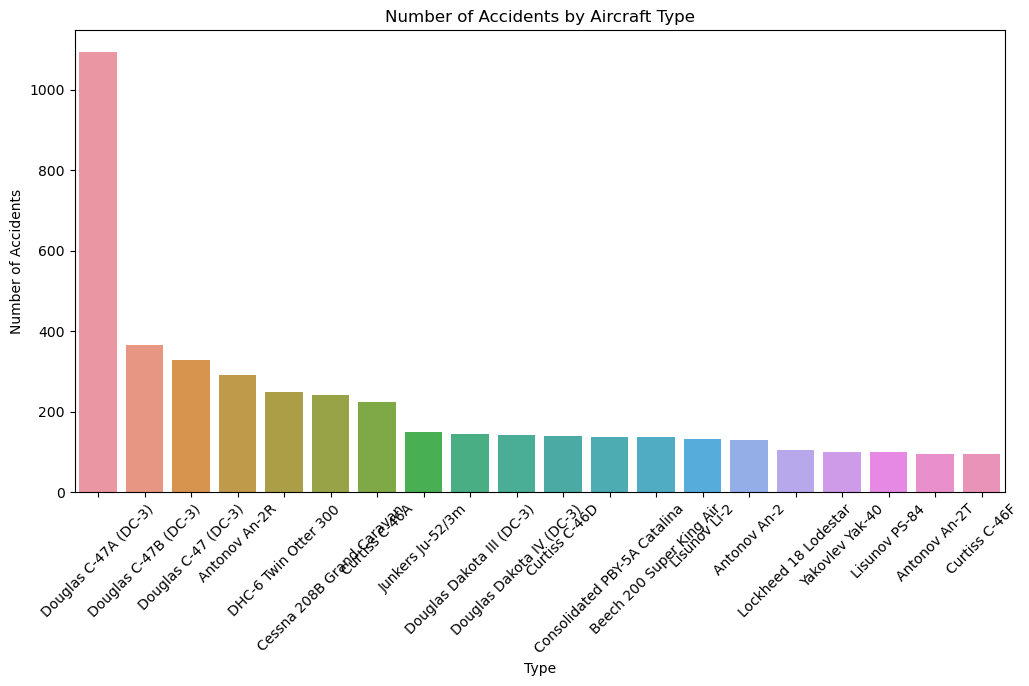

In [29]:
#top 20 aircraft types by accident count
top_aircraft_types = df['type'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_aircraft_types.index, y=top_aircraft_types.values)
plt.title('Number of Accidents by Aircraft Type')
plt.xlabel('Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Bar chart of aircraft type per accidents ,this shows that Douglas C-47A (DC-3) have had the highest number of accidents compared to other aircraft types.

In [30]:
df.to_csv('cleaned_aviation_data.csv', index=False)

DATA ANALYSIS



OBJECTIVES
In order to get the aircraft that have fewer accidents and fatalities, Objective 2 is applied since it directly compares aircraft types and its respective fatalities. Objective 3 is applied to analyze the categories of accidents and the severity of damage because it involves categorizing into the A, H, I, C, U categories and categorizing the damage. Combined, these goals help respond to the questions of the safest type of aircraft and the most frequent types of accidents.
categories are combination of factors and damage level
categories are A=Accident ,I=Incident, H=Hijacking, C=Criminal occurance/Terrorism, U=Unknown occurance
The damage level 1=Hull loss(non-reparable damage) or 2= Repairable damage
I used the 3 columns to determine the safest aircraft with less fatalities.



In [31]:
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [32]:
#display the 3 columns used to determine the safest aircraft type
df[['type', 'cat', 'fatalities']].head(20)


,type,cat,fatalities
62,Felixstowe Fury,A1,1
63,Handley Page O/7,A1,0
64,Handley Page O/400,A1,0
65,Handley Page O/400,A1,0
66,Handley Page O/400,A1,4
68,Handley Page O/7,O1,0
70,Farman F.60 Goliath,A1,2
71,Farman F.60 Goliath,O1,0
72,Farman F.60 Goliath,O1,0
74,Handley Page O/10,A1,0


These are the categories used to determine the safest aircraft,(categories,fatalities and type of aircraft)

In [33]:
#pivot table to see total fatalities per category
cat_avg_fatalities = df.groupby('cat')['fatalities'].sum().sort_values(ascending=False)
print(cat_avg_fatalities)

cat
A1    107462
C1      8025
H1       746
A2       131
H2        96
C2        49
O1        11
O2         2
I1         0
I2         0
U1         0
Name: fatalities, dtype: int32


Category A1(Accident) has the highest number of fatalities followed by C1(Criminal occurrence) while I1, I2& U1 has no fatalities


In [34]:
analysis_pivot = df.pivot_table(index='type', columns='cat', values='fatalities',aggfunc=sum,fill_value=0)
analysis_pivot

C:\Users\DAMA\AppData\Local\Temp\ipykernel_30260\2936563047.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analysis_pivot = df.pivot_table(index='type', columns='cat', values='fatalities',aggfunc=sum,fill_value=0)


cat,A1,A2,C1,C2,H1,H2,I1,I2,O1,O2,U1
type,,,,,,,,,,,
A.W. AW-650 Argosy 101,0,0,0,0,0,0,0,0,0,0,0
A.W. AW-650 Argosy 102,0,0,0,0,0,0,0,0,0,0,0
A.W. AW-650 Argosy 222,0,0,0,0,0,0,0,0,0,0,0
A.W. AW-660 Argosy C.1,13,0,0,0,0,0,0,0,0,0,0
A.W. AW.15 Atalanta,4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Yakovlev Yak-42D,364,0,0,0,0,0,0,0,0,0,0
Yunshuji Y-12-II,0,0,0,0,0,0,0,0,0,0,0
de Havilland DH-106 Comet 4,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#determining the safest aircraft type based on fatalities
safest_aircraft = df.groupby('type')['fatalities'].sum().sort_values()
safest_aircraft.head(20)

type
A.W. AW-650 Argosy 101                 0
Convair CV-340-31                      0
Convair CV-340-13                      0
Convair CV-240D (T-29)                 0
Convair CV-240-6                       0
Convair CV-240-53 (HC-131A)            0
Convair CV-240-53                      0
Convair CV-240-5                       0
Convair CV-240-27                      0
Convair CV-240-24                      0
Convair CV-240-17                      0
Convair CV-340-35                      0
Convair CV-240-14                      0
Convair CV-240                         0
Convair C-131D (CV-340)                0
Consolidated Vultee PBY-6A Catalina    0
Consolidated Tp 47 Canso (PBY-5A)      0
Consolidated PBY-6A Super Catalina     0
Consolidated PB4Y-2 Privateer          0
Consolidated P4Y-2G Super Privateer    0
Name: fatalities, dtype: int32

In [36]:
print("The safest aircraft type based on fatalities is the one with the least number of total fatalities.")
print(safest_aircraft.head(1))

The safest aircraft type based on fatalities is the one with the least number of total fatalities.
type
A.W. AW-650 Argosy 101    0
Name: fatalities, dtype: int32
